<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
require(geomorph)
require(R.matlab)

Loading required package: R.matlab

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen




In [7]:
path <- "../SAMPLE_DATA/asym_data.mat"
data <- readMat(path)

In [8]:
DATA <- data$strDATA
RENDER <- data$strRender

In [17]:
GPA_DATA_INPUT <- readMat("../SAMPLE_DATA/gpa_data.mat")

In [18]:
dim(GPA_DATA_INPUT$TotalShapes)

[1] 29759     3   200

In [20]:
dim(GPA_DATA_INPUT$TotalShapes)

[1] 29759     3   200

In [19]:
gpagen(GPA_DATA_INPUT$TotalShapes)

  |======================================================================| 100%


ERROR: Error: cannot allocate vector of size 59.4 Gb


In [67]:
data[1]

[1] 0

In [23]:
t <- h5read(path, '/Region', bit64conversion='double');

Warning message in H5Dread(h5dataset = h5dataset, h5spaceFile = h5spaceFile, h5spaceMem = h5spaceMem, :
“h5read for type 'REFERENCE' not yet implemented. Values replaced by NA's.”


In [61]:
t$AlignedShapes

, , 1

                  [,1]          [,2]          [,3]
    [1,] -0.1399689466 -9.209353e-01  6.100190e-01
    [2,] -0.3782216012 -8.109157e-01  1.267899e+00
    [3,] -1.0473251343 -1.910564e-01  8.300995e-01
    [4,] -0.1392979920  3.336795e-01  1.065595e+00
    [5,] -0.3184844851 -1.866917e+00  5.141280e-01
    [6,] -1.0758998394 -7.721722e-01  1.042046e+00
    [7,] -0.7236719728  1.003616e+00  1.623700e-01
    [8,] -0.4814252257 -1.024787e+00 -8.310235e-02
    [9,] -1.1148021221 -9.083182e-01 -5.275051e-02
   [10,] -0.6669993401 -4.907781e-01  3.819151e-01
   [11,] -0.7514728904  1.806553e-01 -5.052236e-01
   [12,] -0.1138010621 -9.102175e-01  6.114679e-01
   [13,] -0.0923128054 -8.882787e-01  5.982968e-01
   [14,] -0.0722246021 -8.544322e-01  5.740297e-01
   [15,] -0.0636768639 -8.233297e-01  5.394451e-01
   [16,] -0.0860165879 -7.814939e-01  5.254983e-01
   [17,] -0.1023451462 -7.619690e-01  5.304779e-01
   [18,] -0.1207323596 -7.447580e-01  5.380196e-01
   [19,] -0.1376660168 -7.266558e-01  5.476126e-01
   [20,] -0.1548214406 -7.081443e-01  5.535319e-01
   [21,] -0.1191616133 -9.329799e-01  6.104814e-01
   [22,] -0.0983721912 -9.417798e-01  6.052908e-01
   [23,] -0.0717594698 -9.514089e-01  5.945497e-01
   [24,] -0.0626537204 -9.600461e-01  5.685329e-01
   [25,] -0.0660598576 -9.652447e-01  5.445300e-01
   [26,] -0.0731980130 -9.701133e-01  5.200059e-01
   [27,] -0.0769378170 -9.758925e-01  4.955047e-01
   [28,] -0.0762778074 -9.863906e-01  4.736600e-01
   [29,] -0.0757015422 -9.990170e-01  4.480054e-01
   [30,] -0.0993211493 -1.009353e+00  4.167783e-01
   [31,] -0.1230427548 -1.013566e+00  4.020409e-01
   [32,] -0.1361308098 -1.017871e+00  3.873635e-01
   [33,] -0.1427242756 -1.025782e+00  3.725092e-01
   [34,] -0.1444866508 -1.034855e+00  3.568263e-01
   [35,] -0.1339863539 -1.044814e+00  3.358571e-01
   [36,] -0.1050447673 -1.060885e+00  3.096617e-01
   [37,] -0.0764931887 -1.073296e+00  2.809927e-01
   [38,] -0.0665703267 -1.088324e+00  2.541918e-01
   [39,] -0.0650419742 -1.101015e+00  2.297269e-01
   [40,] -0.0634467527 -1.111590e+00  2.039436e-01
   [41,] -0.0669160038 -1.125292e+00  1.749946e-01
   [42,] -0.0933655947 -1.143268e+00  1.538458e-01
   [43,] -0.1328547746 -1.134293e+00  1.603922e-01
   [44,] -0.1628170311 -1.130968e+00  1.636363e-01
   [45,] -0.1908217371 -1.137269e+00  1.625189e-01
   [46,] -0.2302420735 -1.147425e+00  1.600208e-01
   [47,] -0.2646788061 -1.138530e+00  1.596457e-01
   [48,] -0.2983578444 -1.123204e+00  1.588785e-01
   [49,] -0.3455336988 -1.108647e+00  1.511328e-01
   [50,] -0.3872746527 -1.108464e+00  1.169849e-01
   [51,] -0.4336639345 -1.108779e+00  1.090788e-01
   [52,] -0.4619329274 -1.116320e+00  9.868947e-02
   [53,] -0.4702904820 -1.127399e+00  7.933531e-02
   [54,] -0.4627732337 -1.146016e+00  5.869416e-02
   [55,] -0.4392670095 -1.157282e+00  4.690954e-02
   [56,] -0.4140635729 -1.157738e+00  5.177400e-02
   [57,] -0.3888454139 -1.150963e+00  6.890526e-02
   [58,] -0.3552684188 -1.150696e+00  7.388505e-02
   [59,] -0.3176957071 -1.152400e+00  6.533909e-02
   [60,] -0.2776688039 -1.152705e+00  5.414379e-02
   [61,] -0.2427359819 -1.144926e+00  4.356891e-02
   [62,] -0.2129460424 -1.133565e+00  2.923985e-02
   [63,] -0.1890421957 -1.132070e+00  4.609691e-03
   [64,] -0.1948385686 -1.162545e+00 -3.254953e-02
   [65,] -0.2094723284 -1.190872e+00 -5.624133e-02
   [66,] -0.2360779941 -1.204973e+00 -6.146938e-02
   [67,] -0.2664704323 -1.211815e+00 -6.214977e-02
   [68,] -0.2957530916 -1.211970e+00 -6.432524e-02
   [69,] -0.3208267391 -1.204208e+00 -6.575272e-02
   [70,] -0.3486489654 -1.193327e+00 -6.527784e-02
   [71,] -0.3792845011 -1.171235e+00 -6.266397e-02
   [72,] -0.4068100750 -1.155371e+00 -6.591017e-02
   [73,] -0.4326525331 -1.137451e+00 -7.206946e-02
   [74,] -0.4576035738 -1.116482e+00 -6.750421e-02
   [75,] -0.4745326042 -1.093822e+00 -6.794369e-02
   [76,] -0.4808613062 -1.063841e+00 -7.224263e-02
   [77,] -0.5487470627 -7.834601e-01 -8.112642e-02
   [78,] -0.521

In [7]:
coef(fit2, test = TRUE)


Linear Model fit with lm.rrpp

Number of observations: 40
Number of dependent variables: 24
Data space dimensions: 24
Sums of Squares and Cross-products: Type I
Number of permutations: 1000

Statistics (distances) of coefficients with 95 percent confidence intervals,
effect sizes, and probabilities of exceeding observed values based on
1000 random permutations using RRPP 

                           d.obs  UCL (95%)       Zd Pr(>d)
(Intercept)           1.00036566 1.00014029 7.488013  0.001
speciesTeyah          0.05409051 0.03350192 4.973413  0.001
siteSymp              0.08023393 0.03148656 9.273372  0.001
speciesTeyah:siteSymp 0.11114859 0.04677806 9.347755  0.001



In [4]:
# RRPP example applications

coef(fit2)
coef(fit2, test = TRUE)

,1.X,1.Y,2.X,2.Y,3.X,3.Y,4.X,4.Y,5.X,5.Y,⋯,8.X,8.Y,9.X,9.Y,10.X,10.Y,11.X,11.Y,12.X,12.Y
(Intercept),0.137567316,-0.028026755,0.180706618,-0.10155080,-0.027597810,-0.0058392124,-0.278226130,-0.090323934,-0.308604897,-0.061311132,⋯,-0.187161109,0.103789151,0.0169048886,0.1051395447,0.1823648058,0.077732433,0.386093825,0.0616181577,0.540046526,-0.065529360
speciesTeyah,0.003695735,0.001888963,0.002726000,0.01299203,0.005795971,-0.0001750508,-0.005156789,0.006744308,-0.001368510,0.005030304,⋯,-0.007326728,-0.007747778,-0.0001670612,-0.0057099764,0.0007785425,-0.006597233,-0.003797408,-0.0054945107,0.003691744,0.001399484
siteSymp,0.044317399,0.018665309,0.024436436,0.02573404,-0.006852389,0.0071928196,-0.003745122,-0.008104022,-0.004752432,-0.002260746,⋯,-0.002013601,-0.004120460,0.0059837123,-0.0009915139,0.0135836098,0.005505225,-0.057963623,0.0051572790,-0.002605066,-0.039358690
speciesTeyah:siteSymp,-0.036966127,-0.029948111,-0.003992198,-0.05141433,-0.022298031,-0.0183981841,0.003411255,0.006531635,0.003754796,0.008373130,⋯,0.014348026,0.009968342,0.0071180963,-0.0117418260,-0.0003119226,-0.008985237,-0.012329212,0.0002629169,0.034659956,0.061161614



Linear Model fit with lm.rrpp

Number of observations: 40
Number of dependent variables: 24
Data space dimensions: 24
Sums of Squares and Cross-products: Type I
Number of permutations: 1000

Statistics (distances) of coefficients with 95 percent confidence intervals,
effect sizes, and probabilities of exceeding observed values based on
1000 random permutations using RRPP 

                           d.obs  UCL (95%)       Zd Pr(>d)
(Intercept)           1.00036566 1.00014029 7.488013  0.001
speciesTeyah          0.05409051 0.03350192 4.973413  0.001
siteSymp              0.08023393 0.03148656 9.273372  0.001
speciesTeyah:siteSymp 0.11114859 0.04677806 9.347755  0.001




Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq      F      Z Pr(>F)   
species       1 0.029258 0.029258 0.14856 14.544 4.6024  0.001 **
site          1 0.064375 0.064375 0.32688 32.000 5.7391  0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 5.4021  0.001 **
Residuals    36 0.072422 0.002012 0.36774                        
Total        39 0.196940                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on R-squared distributions

             Df       SS       MS     Rsq      F      Z Pr(>R-squared)   
species       1 0.029258 0.029258 0.14856 14.544 3.2352          0.001 **
site          1 0.064375 0.064375 0.32688 32.000 4.6875          0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 5.0246          0.001 **
Residuals    36 0.072422 0.002012 0.36774                                
Total        39 0.196940                                                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq       F       Z Pr(>F)   
species       1 0.029258 0.029258 0.14856  0.9473 -0.7622  0.771   
site          1 0.064375 0.064375 0.32688  2.0843  0.3774  0.351   
species:site  1 0.030885 0.030885 0.15682 15.3525  5.4021  0.001 **
Residuals    36 0.072422 0.002012 0.36774                          
Total        39 0.196940                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)

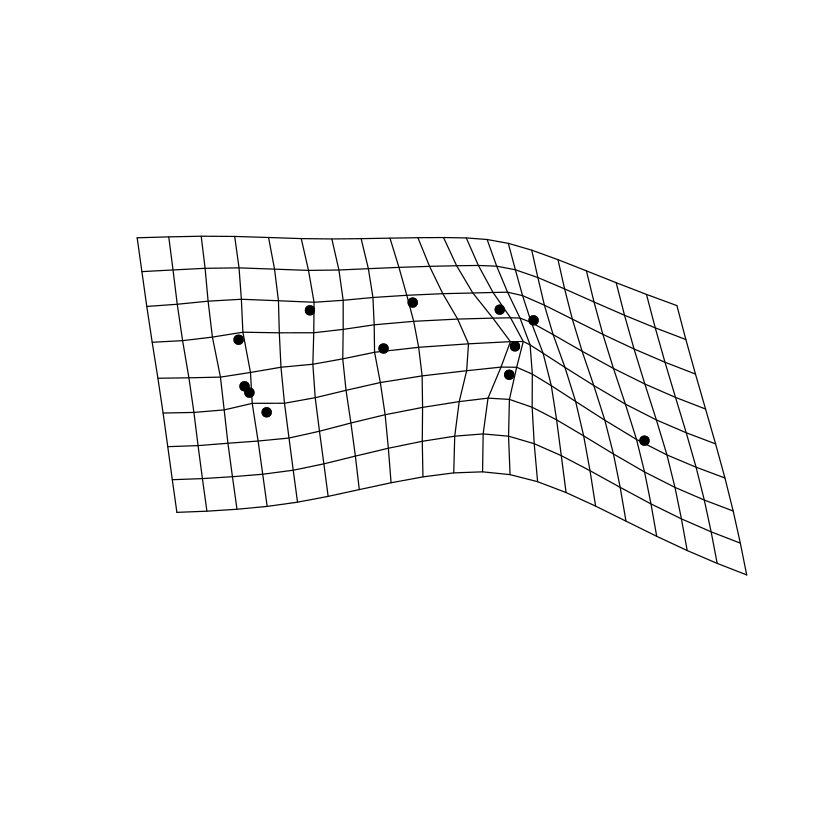

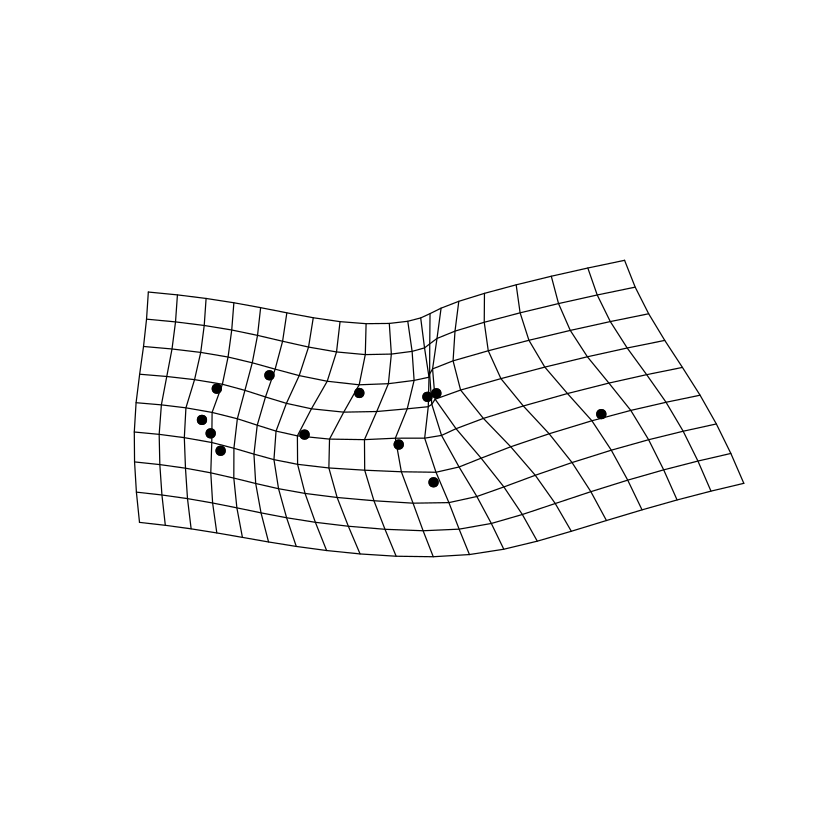

In [5]:
anova(fit2) # same as summary
anova(fit2, effect.type = "Rsq")
# if species and site were modeled as random effects ...
anova(fit2, error = c("species:site", "species:site", "Residuals"))  
# not run, because it is a large object to print 
# remove # to run
# predict(fit2) 

# TPS plots for fitted values of some specimens

M <- Y.gpa$consensus
plotRefToTarget(M, fit2$GM$fitted[,,1], mag = 3)
plotRefToTarget(M, fit2$GM$fitted[,,20], mag = 3)

Loading required package: geomorph

Loading required package: RRPP

Loading required package: rgl



  |======================================================================| 100%



Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of raw values (residuals of mean) 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq      F      Z Pr(>F)   
species       1 0.029258 0.029258 0.14856 14.544 4.6024  0.001 **
site          1 0.064375 0.064375 0.32688 32.000 5.6639  0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 4.6229  0.001 **
Residuals    36 0.072422 0.002012 0.36774                        
Total        39 0.196940                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = FALSE,  
    data = gdf, print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq      F      Z Pr(>F)   
species       1 0.029258 0.029258 0.14856 14.544 4.6024  0.001 **
site          1 0.064375 0.064375 0.32688 32.000 5.7391  0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 5.4021  0.001 **
Residuals    36 0.072422 0.002012 0.36774                        
Total        39 0.196940                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)

,1.X,1.Y,2.X,2.Y,3.X,3.Y,4.X,4.Y,5.X,5.Y,⋯,8.X,8.Y,9.X,9.Y,10.X,10.Y,11.X,11.Y,12.X,12.Y
(Intercept),0.137567316,-0.028026755,0.180706618,-0.10155080,-0.027597810,-0.0058392124,-0.278226130,-0.090323934,-0.308604897,-0.061311132,⋯,-0.187161109,0.103789151,0.0169048886,0.1051395447,0.1823648058,0.077732433,0.386093825,0.0616181577,0.540046526,-0.065529360
speciesTeyah,0.003695735,0.001888963,0.002726000,0.01299203,0.005795971,-0.0001750508,-0.005156789,0.006744308,-0.001368510,0.005030304,⋯,-0.007326728,-0.007747778,-0.0001670612,-0.0057099764,0.0007785425,-0.006597233,-0.003797408,-0.0054945107,0.003691744,0.001399484
siteSymp,0.044317399,0.018665309,0.024436436,0.02573404,-0.006852389,0.0071928196,-0.003745122,-0.008104022,-0.004752432,-0.002260746,⋯,-0.002013601,-0.004120460,0.0059837123,-0.0009915139,0.0135836098,0.005505225,-0.057963623,0.0051572790,-0.002605066,-0.039358690
speciesTeyah:siteSymp,-0.036966127,-0.029948111,-0.003992198,-0.05141433,-0.022298031,-0.0183981841,0.003411255,0.006531635,0.003754796,0.008373130,⋯,0.014348026,0.009968342,0.0071180963,-0.0117418260,-0.0003119226,-0.008985237,-0.012329212,0.0002629169,0.034659956,0.061161614



Linear Model fit with lm.rrpp

Number of observations: 40
Number of dependent variables: 24
Data space dimensions: 24
Sums of Squares and Cross-products: Type I
Number of permutations: 1000

Statistics (distances) of coefficients with 95 percent confidence intervals,
effect sizes, and probabilities of exceeding observed values based on
1000 random permutations using RRPP 

                           d.obs  UCL (95%)       Zd Pr(>d)
(Intercept)           1.00036566 1.00014029 7.488013  0.001
speciesTeyah          0.05409051 0.03350192 4.973413  0.001
siteSymp              0.08023393 0.03148656 9.273372  0.001
speciesTeyah:siteSymp 0.11114859 0.04677806 9.347755  0.001




Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq      F      Z Pr(>F)   
species       1 0.029258 0.029258 0.14856 14.544 4.6024  0.001 **
site          1 0.064375 0.064375 0.32688 32.000 5.7391  0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 5.4021  0.001 **
Residuals    36 0.072422 0.002012 0.36774                        
Total        39 0.196940                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on R-squared distributions

             Df       SS       MS     Rsq      F      Z Pr(>R-squared)   
species       1 0.029258 0.029258 0.14856 14.544 3.2352          0.001 **
site          1 0.064375 0.064375 0.32688 32.000 4.6875          0.001 **
species:site  1 0.030885 0.030885 0.15682 15.352 5.0246          0.001 **
Residuals    36 0.072422 0.002012 0.36774                                
Total        39 0.196940                                                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

             Df       SS       MS     Rsq       F       Z Pr(>F)   
species       1 0.029258 0.029258 0.14856  0.9473 -0.7622  0.771   
site          1 0.064375 0.064375 0.32688  2.0843  0.3774  0.351   
species:site  1 0.030885 0.030885 0.15682 15.3525  5.4021  0.001 **
Residuals    36 0.072422 0.002012 0.36774                          
Total        39 0.196940                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ species * site, iter = 999, RRPP = TRUE,  
    data = gdf, print.progress = FALSE)

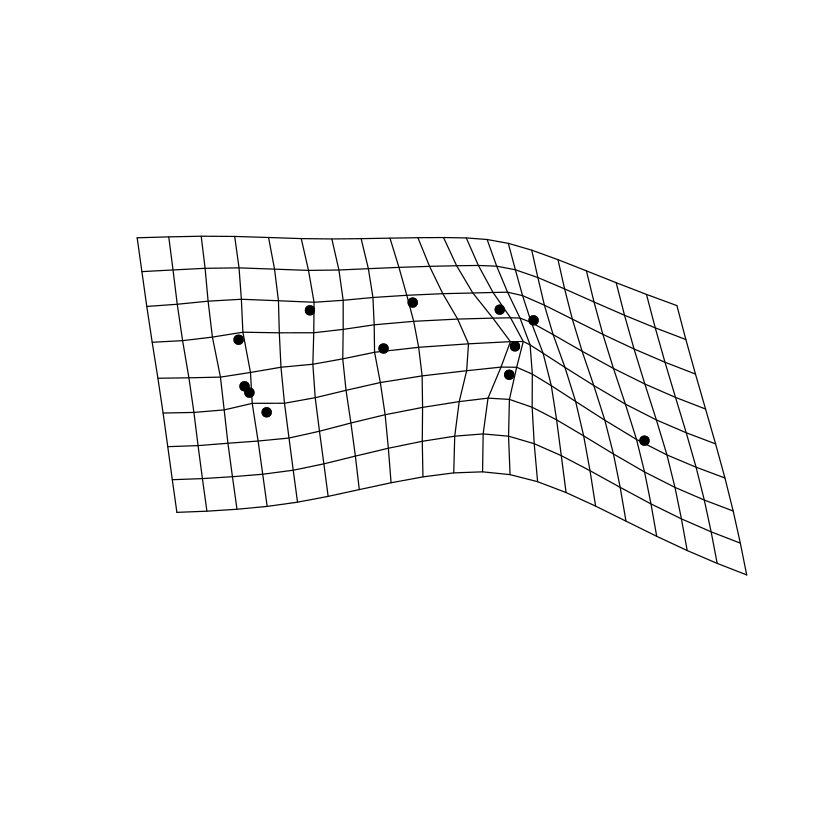


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Effect sizes (Z) based on F distributions

                                            ResDf Df      RSS       SS       MS
coords ~ log(Csize) + species + site (Null)    36  1 0.098490                  
coords ~ log(Csize) + species * site           35  1 0.068671 0.029819 0.029819
Total                                          39    0.196940                  
                                                Rsq      F      Z     P Pr(>F)
coords ~ log(Csize) + species + site (Null) 0.00000                           
coords ~ log(Csize) + species * site        0.15141 15.198 5.3983 0.001       
Total                                                                         


Pairwise comparisons

Groups: Jord.Allo Teyah.Allo Jord.Symp Teyah.Symp 

RRPP: 1000 permutations

LS means:
Vectors hidden (use show.vectors = TRUE to view)

Pairwise distances between means, plus statistics
                               d  UCL (95%)          Z Pr > d
Jord.Allo:Teyah.Allo  0.02473040 0.07533857 -2.7249032  1.000
Jord.Allo:Jord.Symp   0.09396152 0.09160260  2.0561829  0.026
Jord.Allo:Teyah.Symp  0.10148561 0.11790438 -0.1987049  0.556
Teyah.Allo:Jord.Symp  0.08999162 0.10563766 -0.2716541  0.605
Teyah.Allo:Teyah.Symp 0.09949285 0.09241917  2.8942161  0.002
Jord.Symp:Teyah.Symp  0.10547890 0.07475256  4.3301832  0.001


Pairwise comparisons

Groups: Jord.Allo Teyah.Allo Jord.Symp Teyah.Symp 

RRPP: 1000 permutations

LS means:
Vectors hidden (use show.vectors = TRUE to view)

Pairwise distances between means
            Jord.Allo Teyah.Allo  Jord.Symp Teyah.Symp
Jord.Allo  0.00000000 0.02473040 0.09396152 0.10148561
Teyah.Allo 0.02473040 0.00000000 0.08999162 0.09949285
Jord.Symp  0.09396152 0.08999162 0.00000000 0.10547890
Teyah.Symp 0.10148561 0.09949285 0.10547890 0.00000000

Pairwise 95% upper confidence limits between means
            Jord.Allo Teyah.Allo  Jord.Symp Teyah.Symp
Jord.Allo  0.00000000 0.07533857 0.09160260 0.11790438
Teyah.Allo 0.07533857 0.00000000 0.10563766 0.09241917
Jord.Symp  0.09160260 0.10563766 0.00000000 0.07475256
Teyah.Symp 0.11790438 0.09241917 0.07475256 0.00000000

Pairwise effect sizes (Z) between means
            Jord.Allo Teyah.Allo  Jord.Symp Teyah.Symp
Jord.Allo   0.0000000 -2.7249032  2.0561829 -0.1987049
Teyah.Allo -2.7249032  0.0000000 -0.2716541  2.8942161


Pairwise comparisons

Groups: Jord.Allo Teyah.Allo Jord.Symp Teyah.Symp 

RRPP: 1000 permutations


Observed variances by group

  Jord.Allo  Teyah.Allo   Jord.Symp  Teyah.Symp 
0.001870410 0.001654327 0.001830881 0.001511529 

Pairwise distances between variances, plus statistics
                                 d    UCL (95%)          Z Pr > d
Jord.Allo:Teyah.Allo  2.160830e-04 0.0006020686 -0.2083660  0.507
Jord.Allo:Jord.Symp   3.952926e-05 0.0006128574 -1.1421056  0.899
Jord.Allo:Teyah.Symp  3.588812e-04 0.0005738948  0.6100356  0.251
Teyah.Allo:Jord.Symp  1.765538e-04 0.0006233437 -0.4461009  0.610
Teyah.Allo:Teyah.Symp 1.427982e-04 0.0005930891 -0.5675743  0.642
Jord.Symp:Teyah.Symp  3.193519e-04 0.0005958762  0.4280210  0.301


Pairwise comparisons

Groups: Jord.Allo Teyah.Allo Jord.Symp Teyah.Symp 

RRPP: 1000 permutations


Observed variances by group

  Jord.Allo  Teyah.Allo   Jord.Symp  Teyah.Symp 
0.001870410 0.001654327 0.001830881 0.001511529 

Pairwise distances between variances
              Jord.Allo   Teyah.Allo    Jord.Symp   Teyah.Symp
Jord.Allo  0.000000e+00 0.0002160830 3.952926e-05 0.0003588812
Teyah.Allo 2.160830e-04 0.0000000000 1.765538e-04 0.0001427982
Jord.Symp  3.952926e-05 0.0001765538 0.000000e+00 0.0003193519
Teyah.Symp 3.588812e-04 0.0001427982 3.193519e-04 0.0000000000

Pairwise 95% upper confidence limits between variances
              Jord.Allo   Teyah.Allo    Jord.Symp   Teyah.Symp
Jord.Allo  0.0000000000 0.0006020686 0.0006128574 0.0005738948
Teyah.Allo 0.0006020686 0.0000000000 0.0006233437 0.0005930891
Jord.Symp  0.0006128574 0.0006233437 0.0000000000 0.0005958762
Teyah.Symp 0.0005738948 0.0005930891 0.0005958762 0.0000000000

Pairwise effect sizes (Z) between variances
   



Performimg pairwise comparisons of disparity
  |======================================================================| 100%



Call:
morphol.disparity(f1 = fit.full, groups = gp, iter = 999) 



Randomized Residual Permutation Procedure Used
1000 Permutations

Procrustes variances for defined groups
  Jord.Allo  Teyah.Allo   Jord.Symp  Teyah.Symp 
0.001870410 0.001654327 0.001830881 0.001511529 


Pairwise absolute differences between variances
              Jord.Allo   Teyah.Allo    Jord.Symp   Teyah.Symp
Jord.Allo  0.000000e+00 0.0002160830 3.952926e-05 0.0003588812
Teyah.Allo 2.160830e-04 0.0000000000 1.765538e-04 0.0001427982
Jord.Symp  3.952926e-05 0.0001765538 0.000000e+00 0.0003193519
Teyah.Symp 3.588812e-04 0.0001427982 3.193519e-04 0.0000000000


P-Values
           Jord.Allo Teyah.Allo Jord.Symp Teyah.Symp
Jord.Allo      1.000      0.507     0.899      0.251
Teyah.Allo     0.507      1.000     0.610      0.642
Jord.Symp      0.899      0.610     1.000      0.301
Teyah.Symp     0.251      0.642     0.301      1.000



  |======================================================================| 100%



Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 1000 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

           Df      SS      MS     Rsq      F      Z Pr(>F)   
Csize       1 0.64035 0.64035 0.76016 513.46 6.4178  0.001 **
Residuals 162 0.20203 0.00125 0.23984                        
Total     163 0.84239                                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ Csize, iter = 999, RRPP = TRUE, data = gdf,  
    print.progress = FALSE)

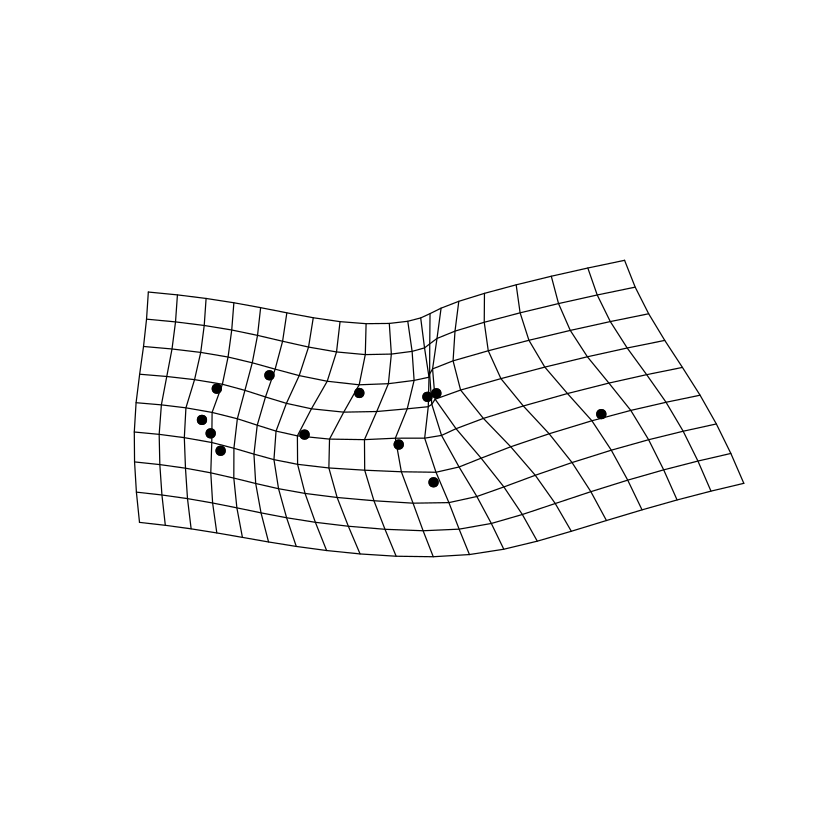

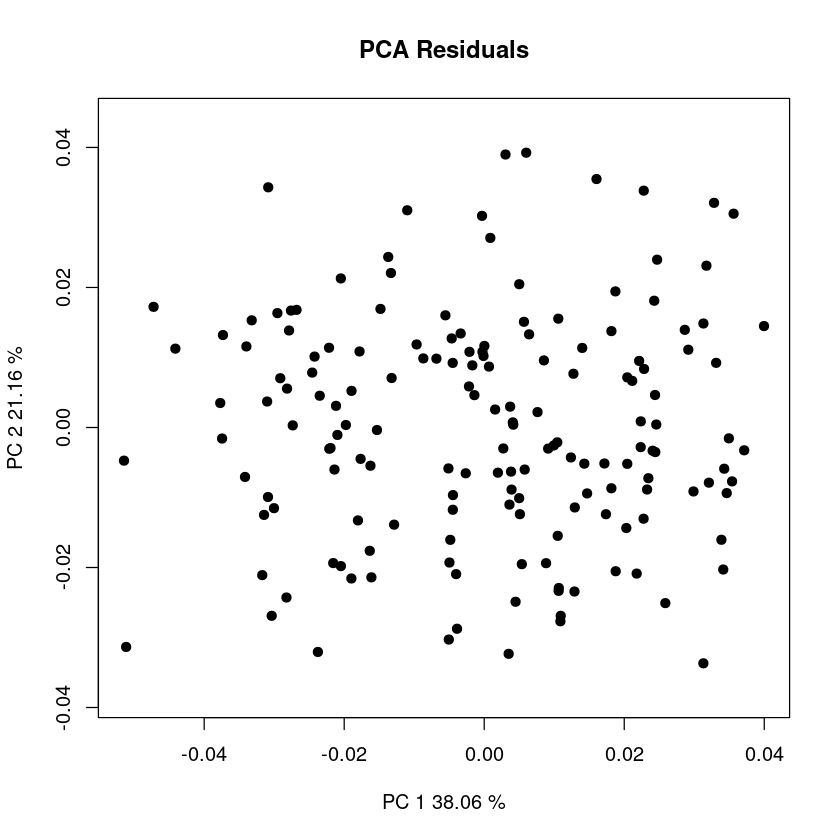

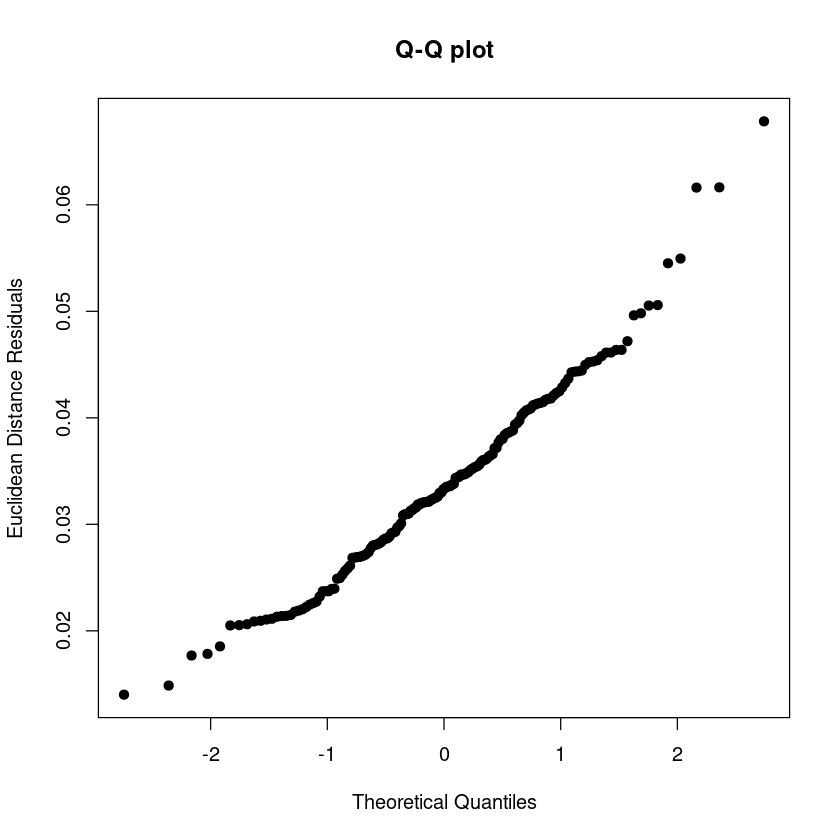

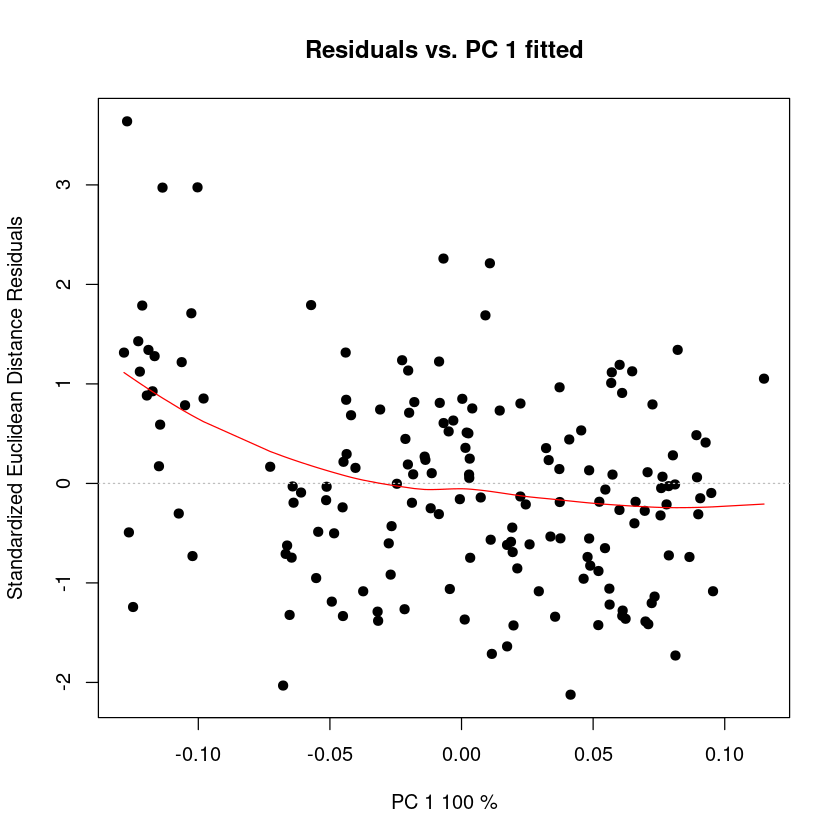

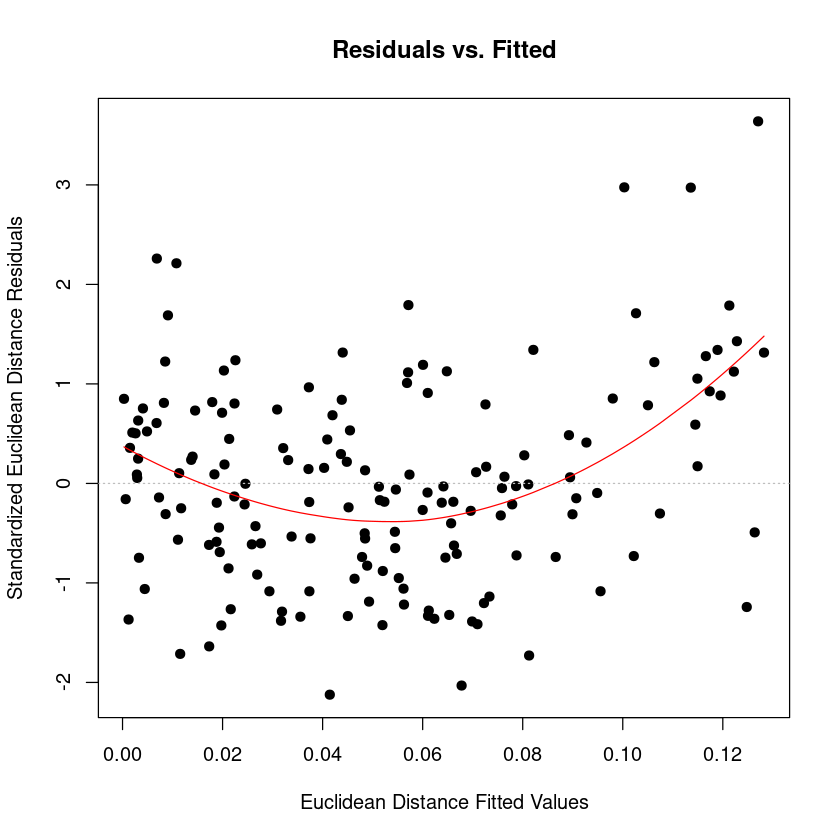

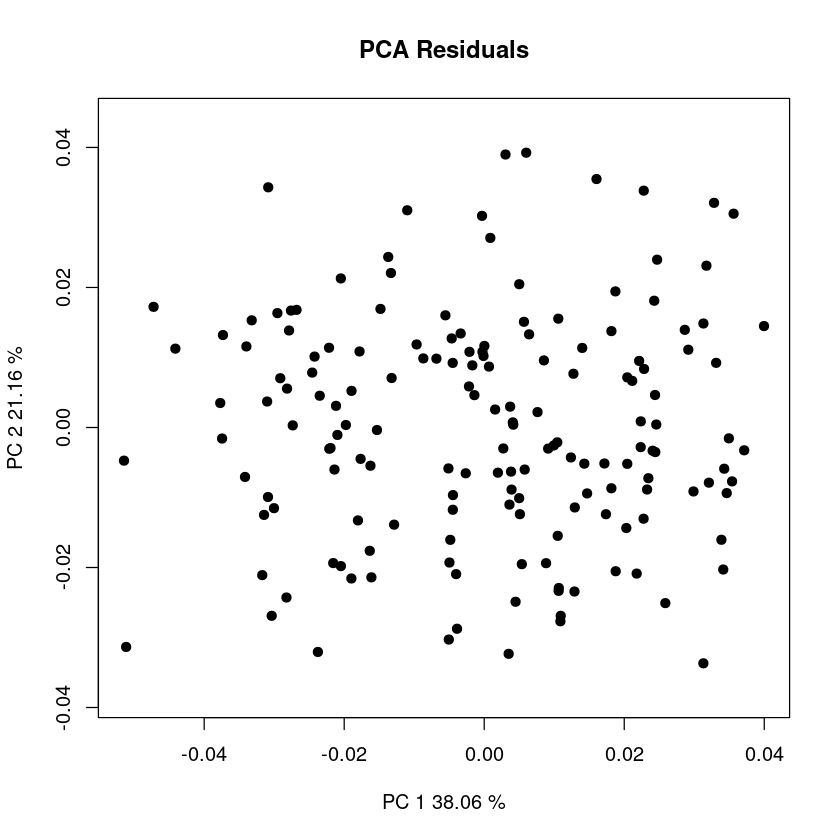

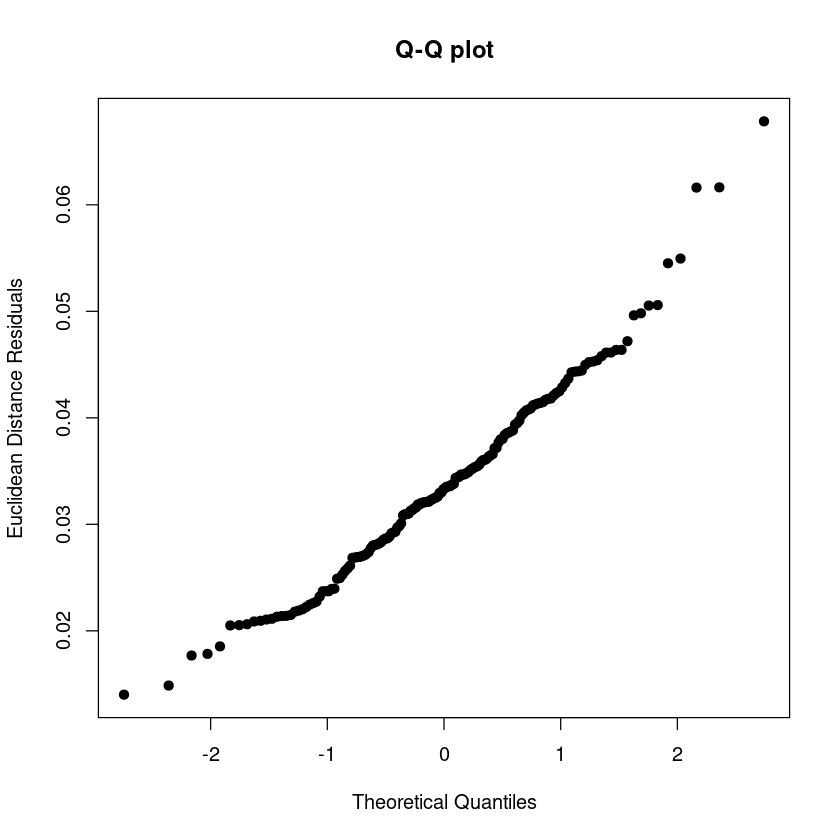

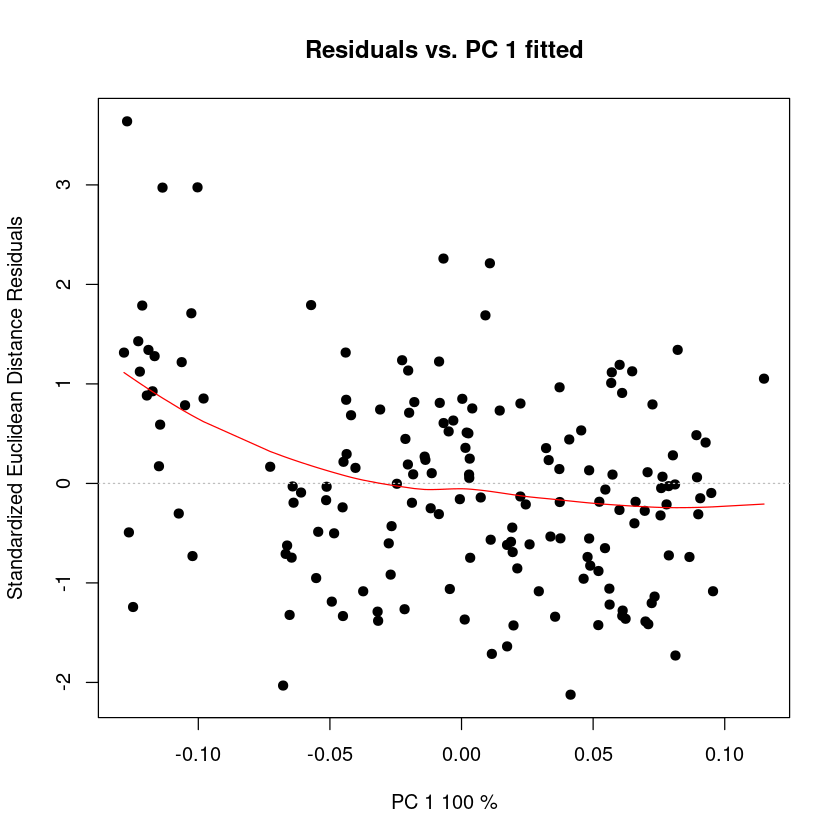

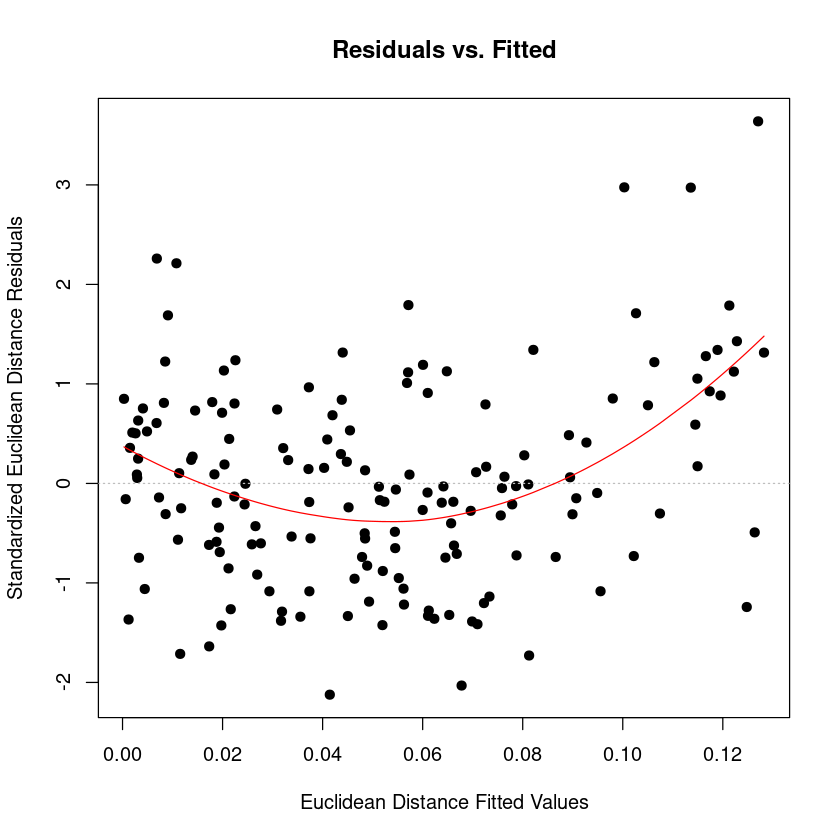

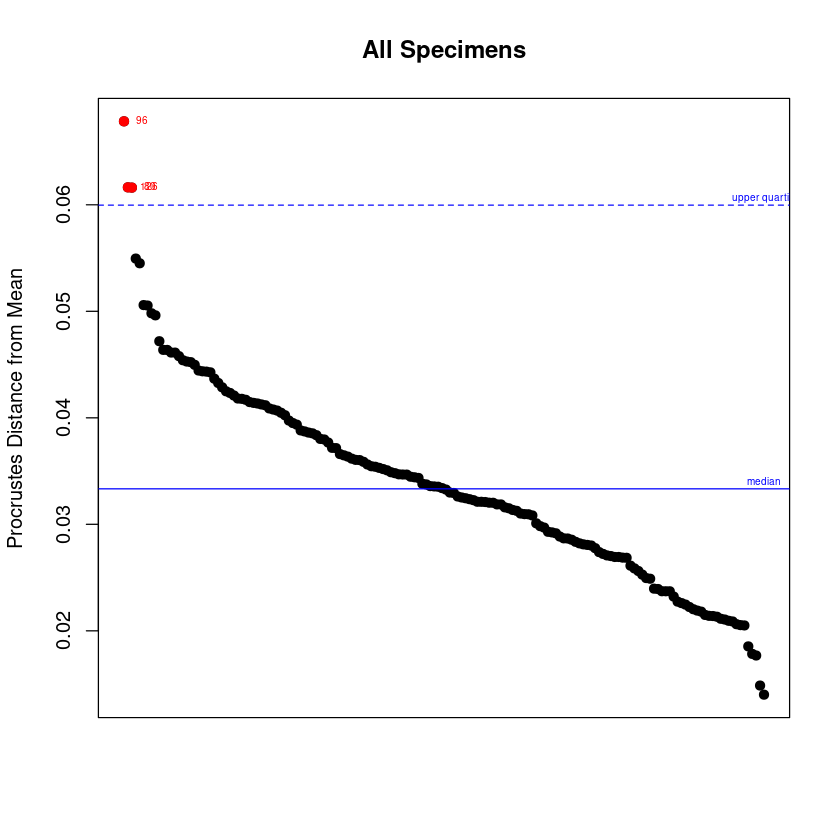

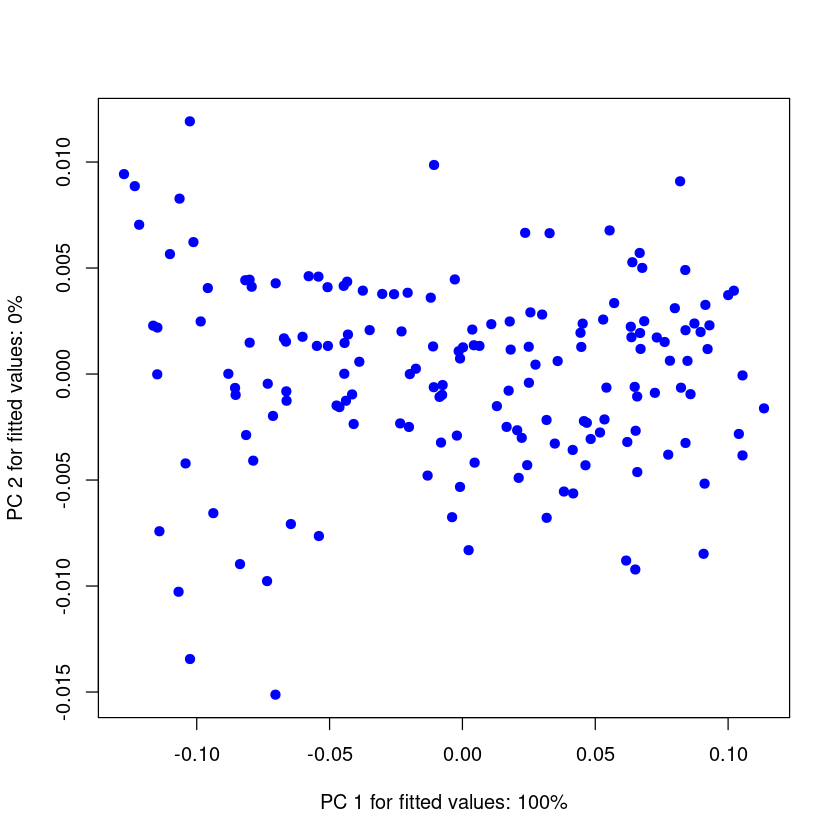

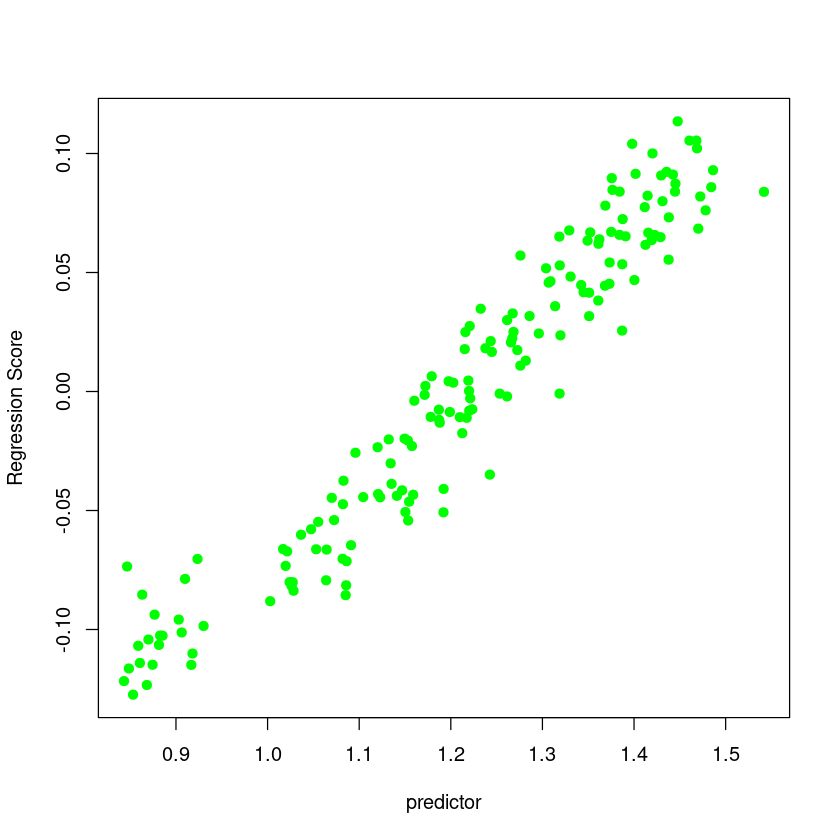

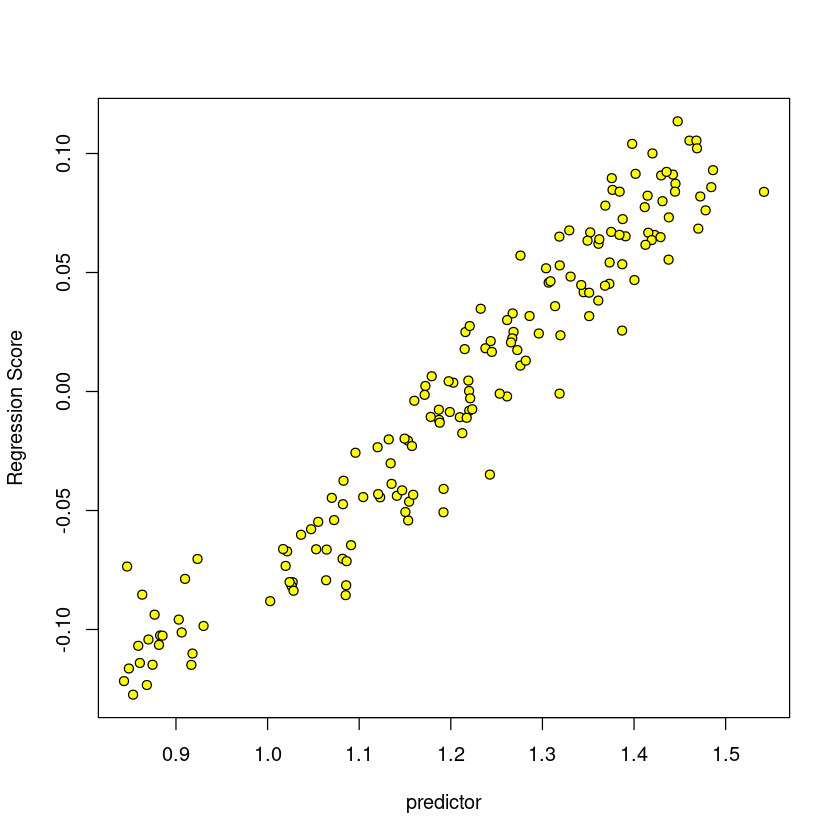

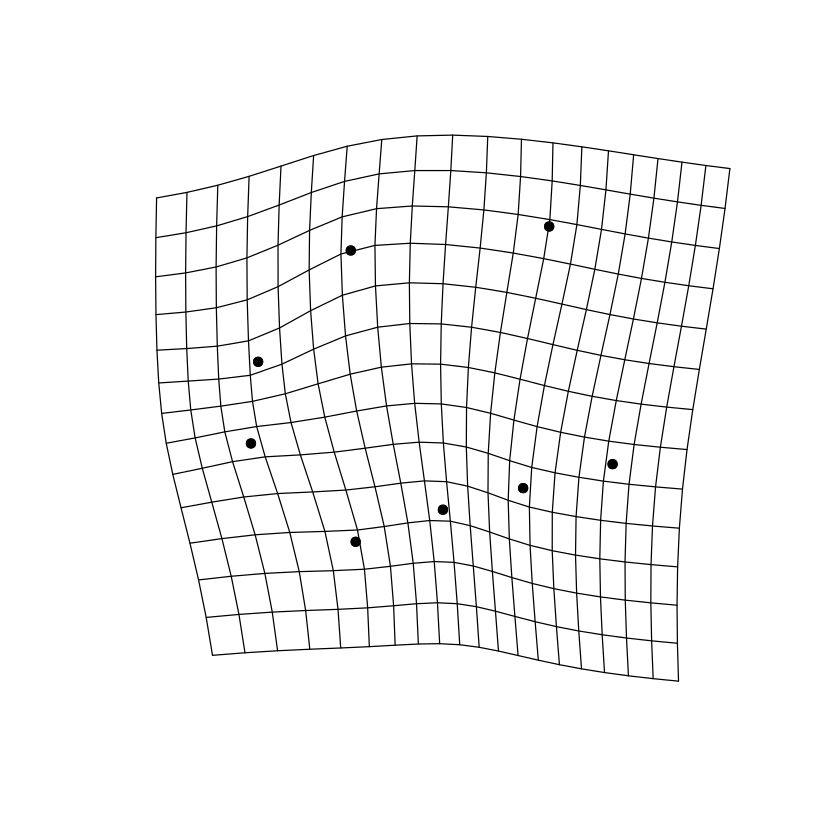

$names
 [1] "aov.table"    "call"         "coefficients" "Y"            "X"           
 [6] "QR"           "fitted"       "residuals"    "Terms"        "term.labels" 
[11] "data"         "call"         "LM"           "ANOVA"        "PermInfo"    
[16] "Models"       "fitted"       "residuals"    "coefficients" "GM"          

$class
[1] "procD.lm" "lm.rrpp"

,1.X,1.Y,2.X,2.Y,3.X,3.Y,4.X,4.Y,5.X,5.Y,6.X,6.Y,7.X,7.Y,8.X,8.Y
1,-0.1827339,-0.2578587,-0.3638307,-0.06361686,-0.3377635,0.1203735,-0.1390497,0.2912643,0.2598910,0.3441828,0.4700421,-0.08470729,0.2559298,-0.1438834,0.03751473,-0.2057544
2,-0.2092312,-0.2445648,-0.3661314,-0.05989797,-0.3342447,0.1284900,-0.1360314,0.2618813,0.2474542,0.3154686,0.4976624,-0.06819791,0.2719047,-0.1314454,0.02861742,-0.2017338
3,-0.2204683,-0.2389271,-0.3671071,-0.05832084,-0.3327524,0.1319320,-0.1347515,0.2494204,0.2421799,0.3032914,0.5093756,-0.06119657,0.2786794,-0.1261707,0.02484422,-0.2000287


, , 1

            [,1]        [,2]
[1,] -0.18273386 -0.25785869
[2,] -0.36383065 -0.06361686
[3,] -0.33776353  0.12037353
[4,] -0.13904967  0.29126433
[5,]  0.25989101  0.34418285
[6,]  0.47004213 -0.08470729
[7,]  0.25592985 -0.14388342
[8,]  0.03751473 -0.20575445

, , 2

            [,1]        [,2]
[1,] -0.20923119 -0.24456478
[2,] -0.36613136 -0.05989797
[3,] -0.33424468  0.12848999
[4,] -0.13603144  0.26188126
[5,]  0.24745418  0.31546863
[6,]  0.49766236 -0.06819791
[7,]  0.27190471 -0.13144541
[8,]  0.02861742 -0.20173381

, , 3

            [,1]        [,2]
[1,] -0.22046826 -0.23892705
[2,] -0.36710705 -0.05832084
[3,] -0.33275240  0.13193204
[4,] -0.13475146  0.24942040
[5,]  0.24217993  0.30329141
[6,]  0.50937564 -0.06119657
[7,]  0.27867938 -0.12617066
[8,]  0.02484422 -0.20002872


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 200 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

                  Df      SS        MS     Rsq      F      Z Pr(>F)   
treatment          5 0.08681 0.0173627 0.23116 6.9734 5.8658  0.005 **
treatment:family  18 0.06466 0.0035923 0.17217 1.4428 2.3843  0.015 * 
Residuals         90 0.22409 0.0024899 0.59667                        
Total            113 0.37556                                          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ treatment/family, iter = 199, data = gdf,  
    print.progress = FALSE)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 200 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

                  Df      SS        MS     Rsq      F      Z Pr(>F)   
treatment          5 0.08681 0.0173627 0.23116 4.8333 3.9431  0.005 **
treatment:family  18 0.06466 0.0035923 0.17217 1.4428 2.3843  0.015 * 
Residuals         90 0.22409 0.0024899 0.59667                        
Total            113 0.37556                                          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ treatment/family, iter = 199, data = gdf,  
    print.progress = FALSE)

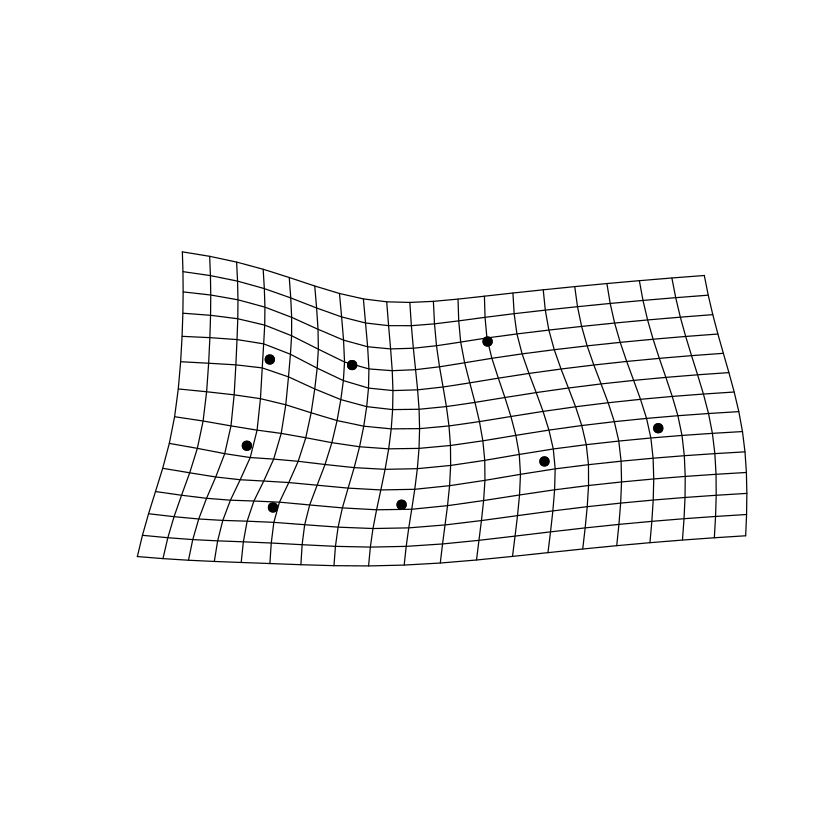

In [1]:
### THE FOLLOWING ILLUSTRATES SIMPLER SOLUTIONS FOR 
### THE NOW DEPRECATED advanced.procD.lm FUNCTION AND
### PERFORM ANALYSES ALSO FOUND VIA THE morphol.disparity FUNCTION
### USING THE pairwise FUNCTION

# Comparison of LS means, with log(Csize) as a covariate

# Model fits
fit.null <- procD.lm(coords ~ log(Csize) + species + site, data = gdf, 
iter = 999, print.progress = FALSE)
fit.full <- procD.lm(coords ~ log(Csize) + species * site, data = gdf, 
iter = 999, print.progress = FALSE)

# ANOVA, using anova.lm.rrpp function from the RRPP package (replaces advanced.procD.lm)
anova(fit.null, fit.full, print.progress = FALSE)

# Pairwise tests, using pairwise function from the RRPP package
gp <-  interaction(gdf$species, gdf$site)

PW <- pairwise(fit.full, groups = gp, covariate = NULL)

# Pairwise distances between means, summarized two ways (replaces advanced.procD.lm):
summary(PW, test.type = "dist", confidence = 0.95, stat.table = TRUE)
summary(PW, test.type = "dist", confidence = 0.95, stat.table = FALSE)

# Pairwise comaprisons of group variances, two ways (same as morphol.disaprity):
summary(PW, test.type = "var", confidence = 0.95, stat.table = TRUE)
summary(PW, test.type = "var", confidence = 0.95, stat.table = FALSE)
morphol.disparity(fit.full, groups = gp, iter=999)

### Regression example
data(ratland)
rat.gpa<-gpagen(ratland)         #GPA-alignment
gdf <- geomorph.data.frame(rat.gpa) # geomorph data frame is easy without additional input

fit <- procD.lm(coords ~ Csize, data = gdf, iter = 999, 
RRPP = TRUE, print.progress = FALSE) 
summary(fit)

### Extracting objects and plotting options
# diagnostic plots
plot(fit, type = "diagnostics") 
# diagnostic plots, including plotOutliers
plot(fit, type = "diagnostics", outliers = TRUE) 

# PC plot rotated to major axis of fitted values
plot(fit, type = "PC", pch = 19, col = "blue") 
# Regression-type plots

# Use fitted values from the model to make prediction lines
plot(fit, type = "regression", 
predictor = gdf$Csize, reg.type = "RegScore", 
pch = 19, col = "green")

# Uses coefficients from the model to find the projected regression scores
rat.plot <- plot(fit, type = "regression", 
predictor = gdf$Csize, reg.type = "RegScore", 
pch = 21, bg = "yellow") 

# TPS grids for min and max scores in previous plot
preds <- shape.predictor(fit$GM$fitted, x = rat.plot$RegScore, 
                        predmin = min(rat.plot$RegScore), 
                        predmax = max(rat.plot$RegScore))
M <- rat.gpa$consensus
plotRefToTarget(M, preds$predmin, mag=2)
plotRefToTarget(M, preds$predmax, mag=2)
                        
attributes(fit)
fit$fitted[1:3, ] # the fitted values (first three specimens)
fit$GM$fitted[,, 1:3] # the fitted values as Procrustes coordinates (same specimens)

### THE FOLLOWING ILLUSTRATES SIMPLER SOLUTIONS FOR 
### THE NOW DEPRECATED nested.update FUNCTION USING
### THE anova GENERIC FUNCTION

data("larvalMorph")
Y.gpa <- gpagen(larvalMorph$tailcoords, curves = larvalMorph$tail.sliders,
ProcD = TRUE, print.progress = FALSE)
gdf <- geomorph.data.frame(Y.gpa, treatment = larvalMorph$treatment, 
family = larvalMorph$family)

fit <- procD.lm(coords ~ treatment/family, data = gdf, 
print.progress = FALSE, iter = 199)
anova(fit) # treatment effect not adjusted
anova(fit, error = c("treatment:family", "Residuals")) # treatment effect updated (adjusted)